In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-classification/drug200.csv


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import warnings 
warnings.filterwarnings('ignore')

In [41]:
data=pd.read_csv('/kaggle/input/drug-classification/drug200.csv')


In [42]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [43]:
data.shape

(200, 6)

<Axes: xlabel='Drug'>

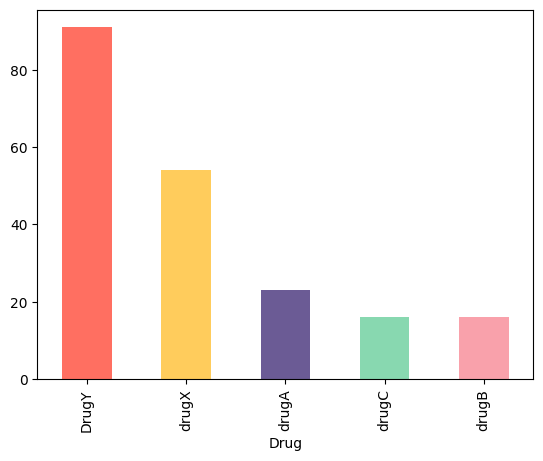

In [44]:
data.Drug.value_counts().plot.bar(color=['#ff6f61', '#ffcc5c', '#6b5b95', '#88d8b0', '#f9a1ab'])


<Axes: ylabel='Age'>

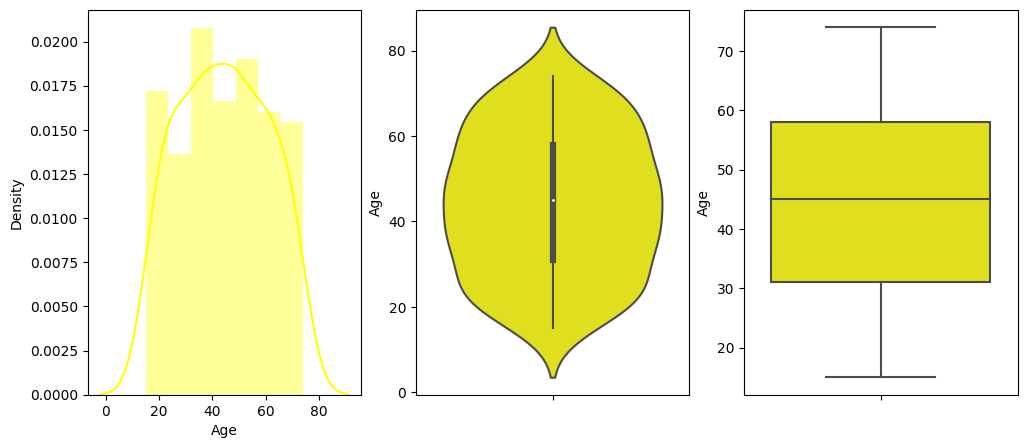

In [45]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.distplot(data.Age, color='yellow')
plt.subplot(1,3,2)
sns.violinplot(data, y='Age', color='yellow')
plt.subplot(1,3,3)
sns.boxplot(data, y='Age', color='yellow')

In [46]:
pd.DataFrame(data.Age.describe()).T


,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315,16.544315,15.0,31.0,45.0,58.0,74.0


Text(0.5, 1.0, 'Age - Drug')

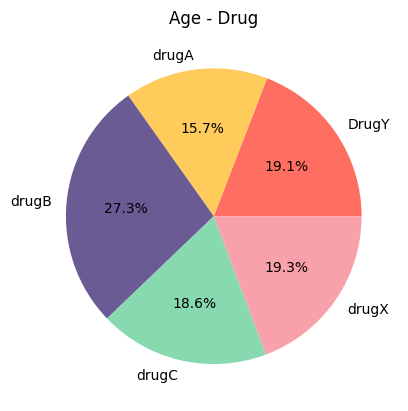

In [47]:
data.groupby('Drug').Age.mean().plot.pie(autopct='%1.1f%%', colors=['#ff6f61', '#ffcc5c', '#6b5b95', '#88d8b0', '#f9a1ab'])
plt.ylabel('')
plt.title('Age - Drug')

Text(0.5, 1.0, 'Sex')

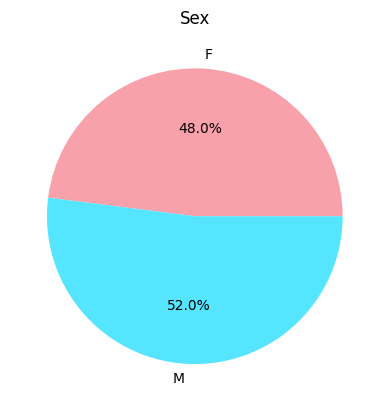

In [48]:
data.groupby('Sex').Sex.value_counts().plot.pie(autopct='%1.1f%%', colors=['#f9a1ab','#56e5ff'])
plt.ylabel('')
plt.title('Sex')

In [49]:
data.BP.value_counts()


BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [50]:
data.Drug.value_counts()


Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

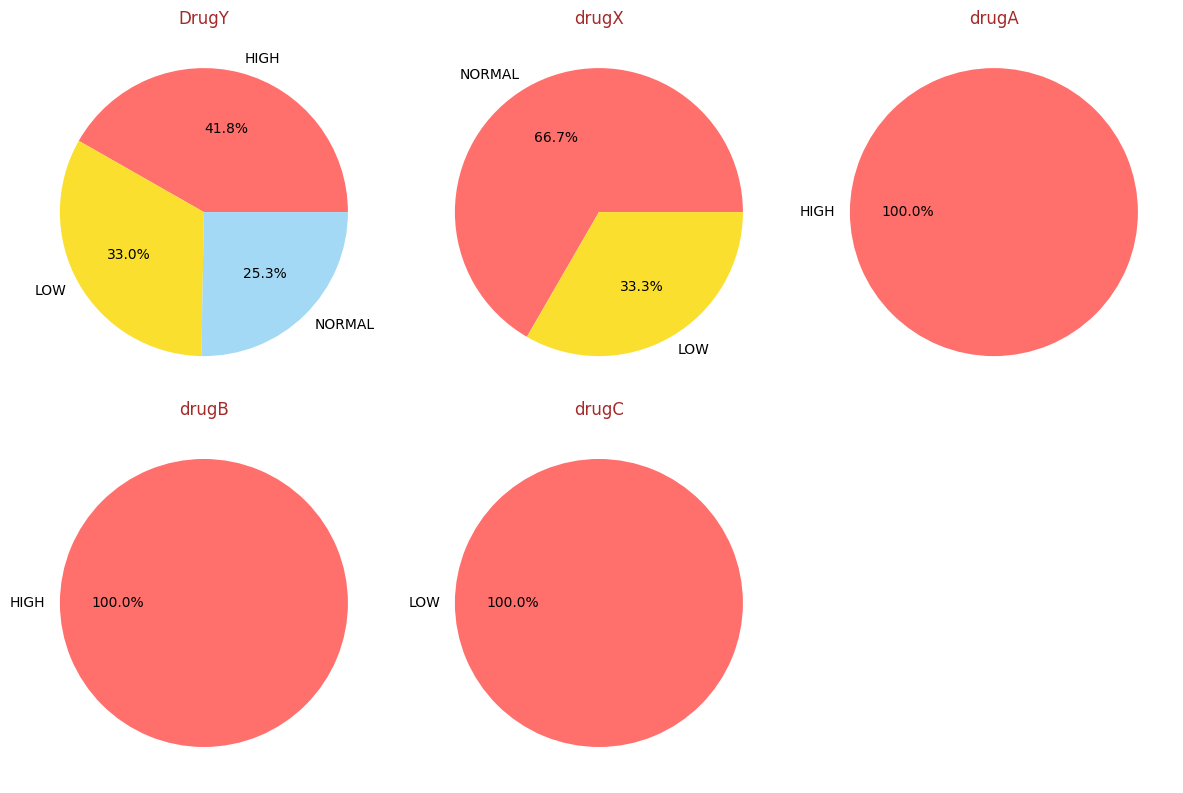

In [51]:
drug_types = ['DrugY', 'drugX', 'drugA', 'drugB', 'drugC']

colors = [
    '#FF6F6C',
    '#FADF2E',
    '#A3D9F5'
]
plt.figure(figsize=(12, 8))

for n, drug in enumerate(drug_types):
    plt.subplot(2, 3, n + 1) 
    data[data['Drug'] == drug].BP.value_counts().plot.pie(
        autopct='%.1f%%', 
        colors=colors  
    )
    plt.title(drug,color='brown')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [52]:
data.sample(2)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
72,24,F,NORMAL,HIGH,10.605,drugX
119,61,F,HIGH,HIGH,25.475,DrugY


In [53]:
data.Cholesterol.value_counts()


Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

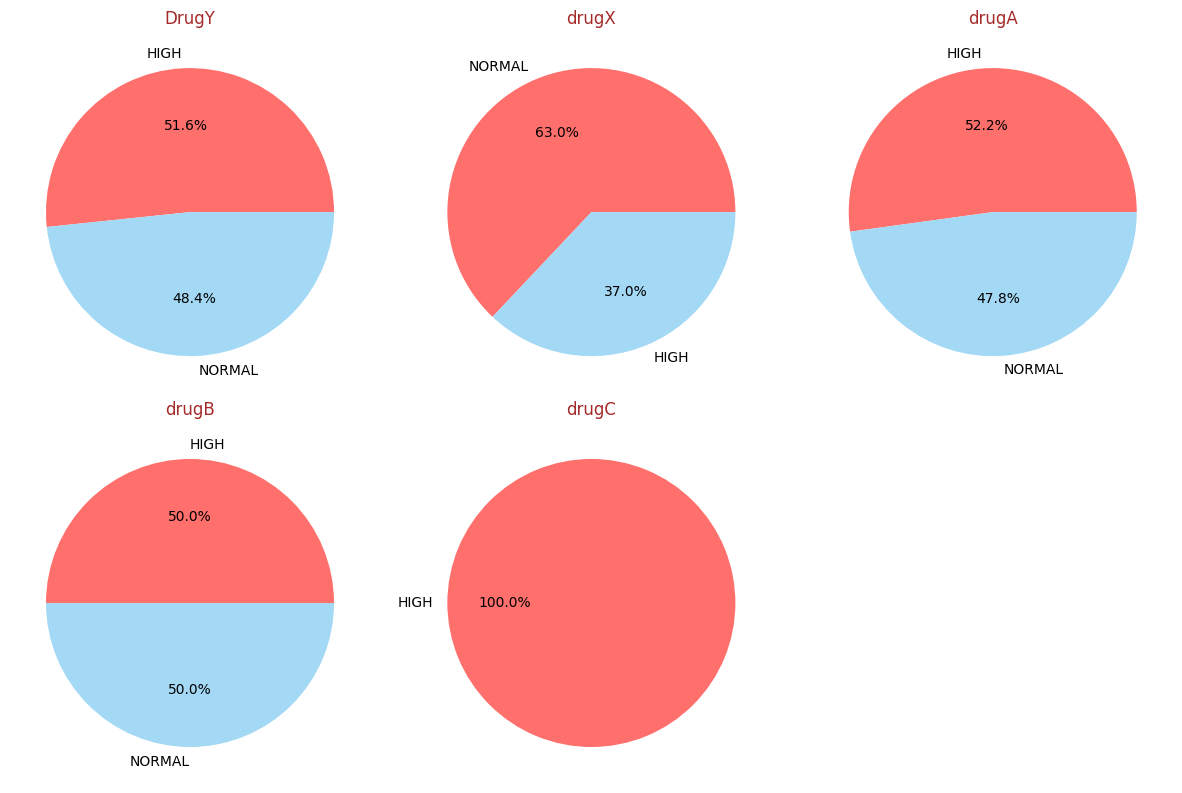

In [54]:
drug_types = ['DrugY', 'drugX', 'drugA', 'drugB', 'drugC']

colors = [
    '#FF6F6C',
    '#A3D9F5'
]
plt.figure(figsize=(12, 8))

for n, drug in enumerate(drug_types):
    plt.subplot(2, 3, n + 1) 
    data[data['Drug'] == drug].Cholesterol.value_counts().plot.pie(
        autopct='%.1f%%', 
        colors=colors  
    )
    plt.title(drug,color='brown')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [55]:
pd.DataFrame(data.Na_to_K.describe()).T


,count,mean,std,min,25%,50%,75%,max
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


<Axes: xlabel='Age', ylabel='Na_to_K'>

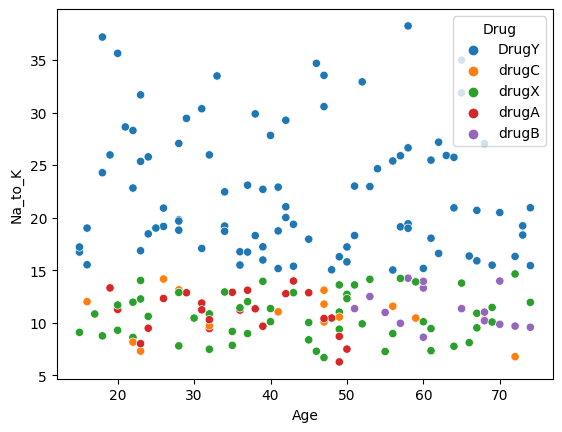

In [56]:
sns.scatterplot(data, x='Age', y='Na_to_K', hue='Drug')


In [57]:
data.sample(2)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
72,24,F,NORMAL,HIGH,10.605,drugX
9,43,M,LOW,NORMAL,19.368,DrugY


In [58]:
data.Drug=data.Drug.map({'DrugY':0,'drugX':1,'drugA':2,'drugB':3,'drugC':4})


In [59]:
dummies=pd.get_dummies(data[['Sex', 'BP', 'Cholesterol']]).astype(int)


In [60]:
data=pd.concat([data[['Age','Na_to_K','Drug']],dummies],axis=1)


In [61]:
data


,Age,Na_to_K,Drug,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,0,1,0,1,0,0,1,0
1,47,13.093,4,0,1,0,1,0,1,0
2,47,10.114,4,0,1,0,1,0,1,0
3,28,7.798,1,1,0,0,0,1,1,0
4,61,18.043,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,4,1,0,0,1,0,1,0
196,16,12.006,4,0,1,0,1,0,1,0
197,52,9.894,1,0,1,0,0,1,1,0
198,23,14.020,1,0,1,0,0,1,0,1


In [62]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Age=pd.DataFrame(data['Age'])
Na_to_K=pd.DataFrame(data['Na_to_K'])

In [63]:
Age_scaler=scaler.fit_transform(Age)
age_scaler=pd.DataFrame(Age_scaler,columns=Age.columns)

In [64]:
Na_to_K_scaler=scaler.fit_transform(Na_to_K)
Na_to_K_scaler=pd.DataFrame(Na_to_K_scaler,columns=Na_to_K.columns)

In [65]:
scal=pd.concat([Na_to_K_scaler,age_scaler],axis=1)


In [66]:
data=data.drop(columns=['Age','Na_to_K'])
data=pd.concat([data,scal],axis=1)

In [67]:
data.sample(2)


,Drug,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Na_to_K,Age
176,2,0,1,1,0,0,0,1,-0.782485,0.223294
14,1,1,0,0,0,1,1,0,-0.469268,0.344485


In [68]:
X=data.drop(columns='Drug')
Y=data['Drug']

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=48)

In [70]:
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [71]:
y_pred=model.predict(X_test)


In [72]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(Y_test,y_pred)

1.0

<Axes: >

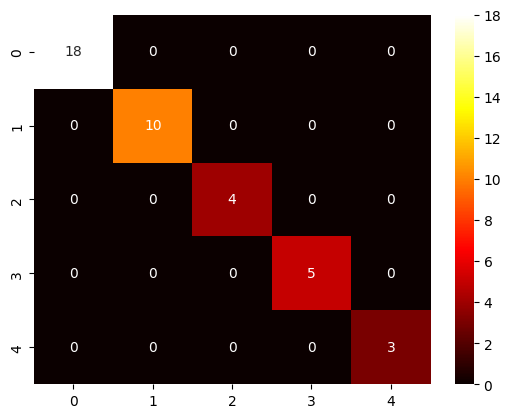

In [73]:
sns.heatmap(confusion_matrix(Y_test,y_pred), cmap='hot', annot=True)


In [74]:
print(classification_report(Y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         3

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

